# DSCI 100 Project Planning Stage

## 1) Data Description
Data was collected while players were actively inside the MineCraft server.

#### players.csv dataset
- Observations: 196
- Variables: 7

| Variable Name | Type | Meaning |
| ------------- | ---- | ------- |
| experience | character | tba |
| subscribe | logical | if the player is subscribed to gaming newsletters |
| hashedEmail | character | email address of the player overall |
| played_hours | number | hours spent online by each player |
| name | character | the name of the player |
| gender | character | the gender of the player |
| Age | number | the age of the player |


#### sessions.csv dataset
- Observations: 1535
- Variables: 5
| Variable Name | Type | Meaning |
| ------------- | ---- | ------- |
| hashedEmail | character | email address of the player |
| start_time | character | time the player began their session (dd-mm-yy) |
| end_time | character | time the player ended their session (dd-m-yy) |
| original_start_time | number | time the player began their session (milliseconds) |
| original_end_time | number | time the player ended their session (milliseconds) |

In [15]:
library(tidyverse)

In [16]:
players_data <- read_csv("https://raw.githubusercontent.com/nkatanchik/dsci_project_planning/refs/heads/main/players.csv")

sessions_data <- read_csv("https://raw.githubusercontent.com/nkatanchik/dsci_project_planning/refs/heads/main/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Summary Statistics

#### players.csv dataset

In [6]:
# summary statistics for the players.csv dataset
summary(players_data)

experience_levels <- unique(players_data$experience)
experience_levels

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

- of the 196 players, **144** are *subscribed*, and **52** are *not subscribed*.
- there are five unique categories within the "experience" variable: Pro, Veteran, Amateur, Regular, & Beginner.

| Measurement | Mean | Min | Max |
| ----------- | ---- | --- | --- |
| played_hours | 5.85 | 0.00 | 223.10 |
| Age | 21.14 | 9.00 | 58.00 |

#### sessions.csv dataset

In [8]:
# summary statistics for the sessions.csv dataset
summary(sessions_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

| Measurement | Mean | Min | Max |
| ----------- | ---- | --- | --- |
| original_start_time | 1.72e+12 | 1.71e+12 | 1.73e+12 |
| original_end_time | 1.72e+12| 1.71e+12 | 1.73e+12 |

### Issues in the Datasets
The data is mostly tidy, however, there are some issues. In sessions.csv, the start_time and end_time columns represent the same values as original_start_time and original_end_time, which makes the data untidy. Additionally, having Age as a "double" type variable instead of "integer" in players.csv may potentially cause issues, because age is not usually taken as a fractional value. Lastly, there are missing values, which may effect data visualizations.

## 2) Questions

**Broad**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific**: Can age and playtime predict subscrption status in the players.csv dataset?

> To answer this question, only the players.csv dataset is needed, as we are only looking at general player characteristics, not data on specific sessions.

### Wrangling Plans
To begin, columns of interest will be selected for. Quantitative variables with large ranges may need to be divided into groups to make visualization easier to interpret. After visualizing the data, further analysis will be done using a predictive method.

## 3) Exploratory Data Analysis and Visualization

In [34]:
players_means <- players_data |>
        mutate(mean_age = mean(Age, na.rm = TRUE)) |>
        mutate(mean_played_hours = mean(played_hours))|>
        select(mean_age, mean_played_hours) |>
        slice(1)

players_means_rounded <- players_means |>
        mutate(mean_age = round(mean_age, 2)) |>
        mutate(mean_played_hours = round(mean_played_hours, 2))
players_means_rounded

mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


Warning message:
“Removed 63 rows containing missing values or values outside the scale range
(`geom_bar()`).”


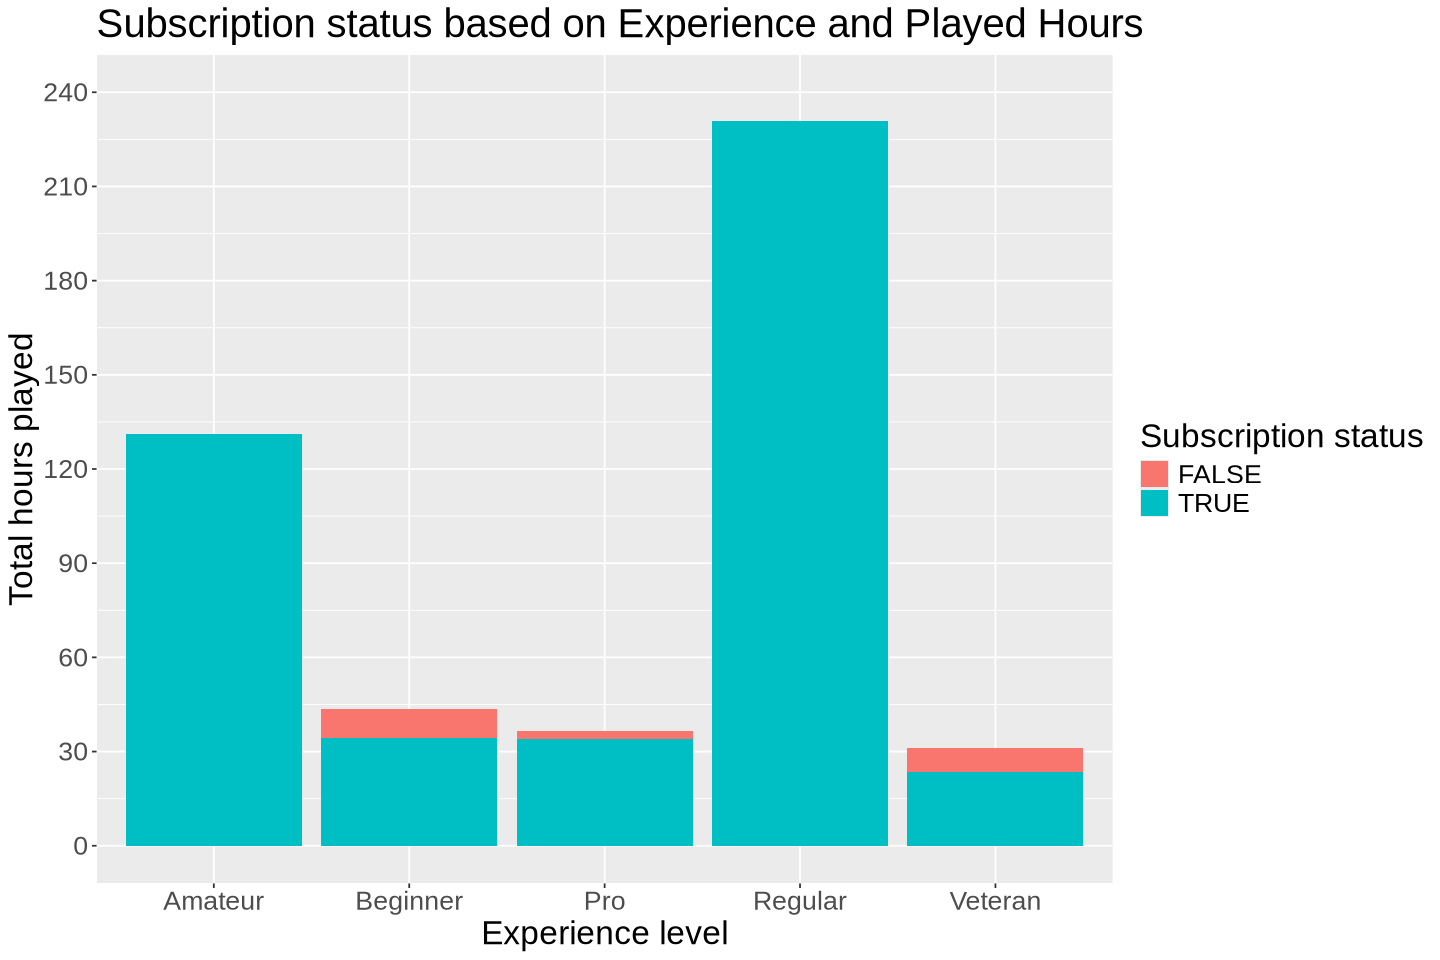

In [74]:
players_selected <- players_data |>
        select(experience, subscribe, played_hours)

options(repr.plot.width = 12, repr.plot.height = 8)
players_plot <- players_selected |>
        ggplot(aes(x = experience, y = played_hours, fill = subscribe)) +
        geom_bar(stat = "identity") +
        scale_y_continuous(
            limits = c(0, 240),
            breaks = seq(0, 240, by = 30)) +
        labs(x = "Experience level", y = "Total hours played", fill = "Subscription status") +
        ggtitle("Subscription status based on Experience and Played Hours") +
        theme(text = element_text(size = 20))
players_plot

Based on this graph, players of "Regular" and "Amateur" experience played the most hours in the server.

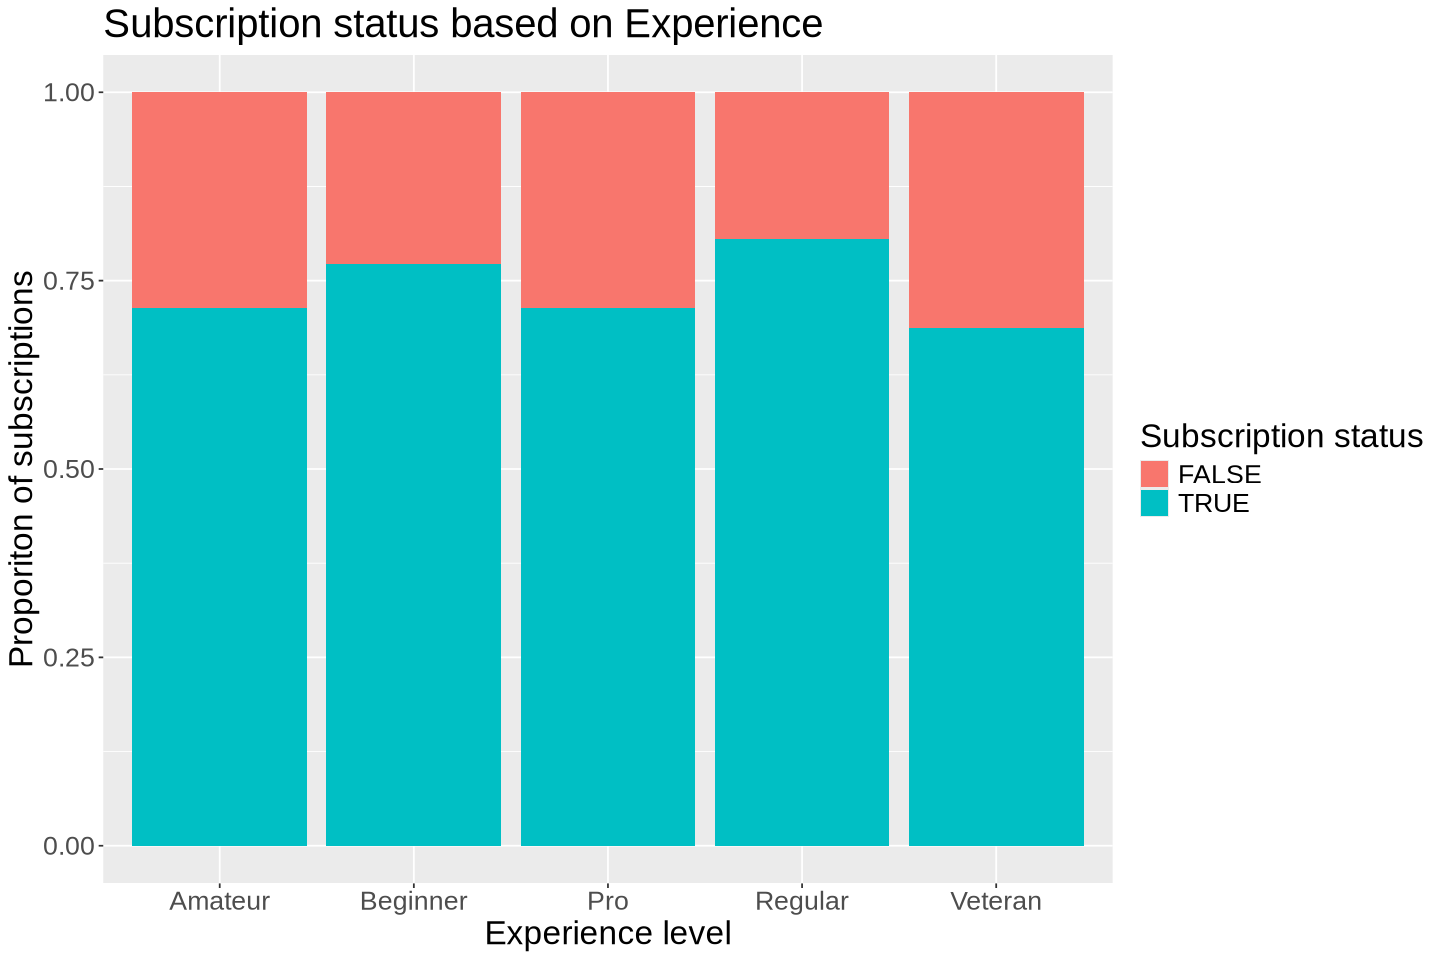

In [75]:
players_plot_exp <- players_selected |>
        ggplot(aes(x = experience, fill = subscribe)) +
        geom_bar(position = "fill") +
        labs(x = "Experience level", y = "Proporiton of subscriptions", fill = "Subscription status") +
        ggtitle("Subscription status based on Experience") +
        theme(text = element_text(size = 20))
players_plot_exp

There appears to be no relationship between experience level and subscription status, as the proportion of subscribed players across all experience categories is similar. "Regular" and "Beginner" players present the highest subscription proportions.

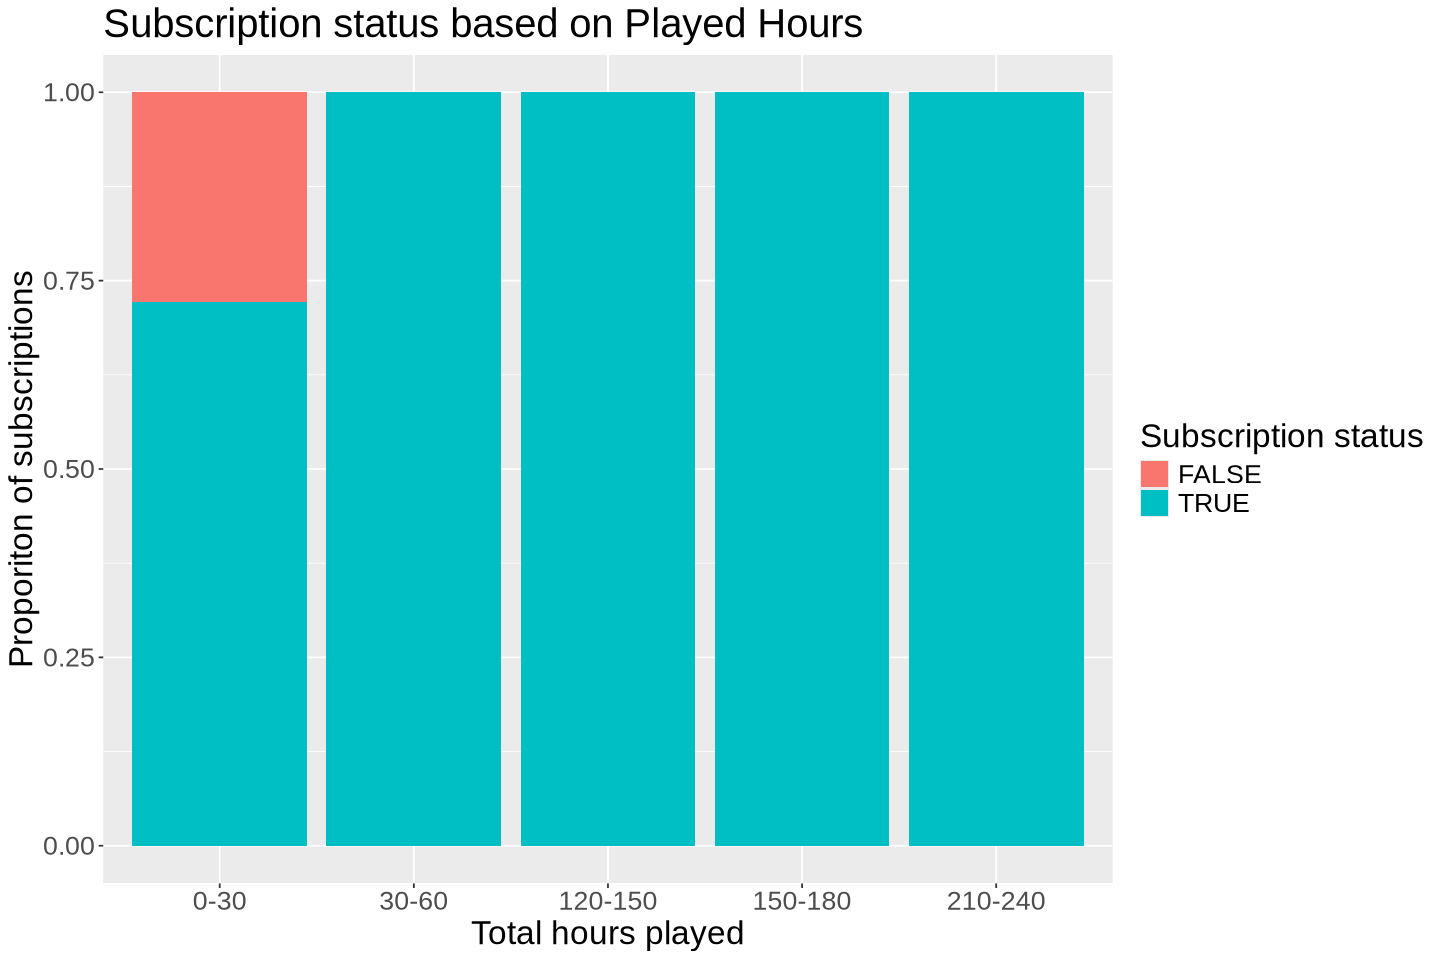

In [76]:
players_hours_grouped <- players_selected |>
            mutate(hours_grouped = 
            cut(players_selected$played_hours,
            breaks = seq(0, 240, by = 30),
            labels = c("0-30", "30-60", "60-90", "90-120", "120-150", "150-180", "180-210", "210-240"),
            include.lowest = TRUE,
            right = TRUE)) |>
            select(hours_grouped, subscribe)

players_plot_hrs <- players_hours_grouped |>
        ggplot(aes(x = hours_grouped, fill = subscribe)) +
        geom_bar(position = "fill") +
        labs(x = "Total hours played", y = "Proporiton of subscriptions", fill = "Subscription status") +
        ggtitle("Subscription status based on Played Hours") +
        theme(text = element_text(size = 20))
players_plot_hrs

Here, we see variability in subscription status in players who spent less than 30 hours playing. Players who spent over 30 hours in the server are all subscribed. This could be interpreted as a weak relationship between playtime and subscription, where fewer played hours leads to fewer scubscriptions.